# 2o dataset

# Isolet Dataset

Λίγα λόγια για την προέλευση των δεδομένων:

Τα δεδομένα του `Isolet` dataset συλλέχθηκαν ως εξής: 150 συμμετέχοντες προέφεραν τους **26 φθόγγους** του λατινικού αλφαβήτου, 2 φορές τον καθένα. Συνεπώς για κάθε συμμετέχοντα, ηχογραφήθηκαν **52 παρατηρήσεις**. Τρεις παρατηρήσεις λέιπουν, πιθανά λόγω δυσκολίας στην ηχογράφηση. Το dataset επομένως περιέχει $150\cdot 52 - 3 = \boldsymbol{7797}$ **παρατηρήσεις**.

Η κάθε ηχογράφηση κωδικοποιήθηκε σε 617 πραγματικές μεταβλητές και κατηγοριοποιήθηκε σε μια νέα στήλη. Άρα το dataset περιλαμβάνει **618 στήλες**-attributes.


`Παραχωρήθηκε από:`

*Department of Computer Science
<br>
Oregon State University, Corvallis*



`Σχετικά Άρθρα:`

1. SFanty, M., Cole, R. (1991).
<br>
*Spoken letter recognition. In Lippman, R. P., Moody, J., and Touretzky, D. S. (Eds).
<br>
Advances in Neural Information Processing Systems 3. San Mateo, CA: Morgan Kaufmann.*

2. Dietterich, T. G., Bakiri, G. (1991)
<br>
*Error-correcting output codes: A general method for improving multiclass inductive learning programs.
<br>
Proceedings of the Ninth National Conference on Artificial Intelligence (AAAI-91), Anaheim, CA: AAAI Press.*

3. Dietterich, T. G., Bakiri, G. (1994)
<br>
*Solving Multiclass Learning Problems via Error-Correcting Output Codes. *


## Προεπεξεργασία του Dataset

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

### Μια πρώτη ματιά

Το dataframe περιέχει **618 στήλες**-attributes. Ξεκινούμε την εξερεύνηση του dataset, τυπώνοντας μια στατιστική περίληψη των attributes:

In [63]:
df = pd.read_csv('isolet_ds.csv')
#στατιστικά των 617 ποσοτικών μεταβλητων-στηλών
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f473,f474,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f522,f523,f524,f525,f526,f527,f528,f529,f530,f531,f532,f533,f534,f535,f536,f537,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617
count,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000

In [64]:
#και η  618η στήλη της κατηγοριοποίησης
pd.DataFrame(df.loc[:,'label']).transpose()

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
label  '1'  '1'  '2'  '2'  '3'  '3'  '4'  '4'  '5'  '5'  '6'  '6'  '7'  '7'   

        14   15   16   17    18    19    20    21    22    23    24    25  \
label  '8'  '8'  '9'  '9'  '10'  '10'  '11'  '11'  '12'  '12'  '13'  '13'   

         26    27    28    29    30    31    32    33    34    35    36    37  \
label  '14'  '14'  '15'  '15'  '16'  '16'  '17'  '17'  '18'  '18'  '19'  '19'   

         38    39    40    41    42    43    44    45    46    47    48    49  \
label  '20'  '20'  '21'  '21'  '22'  '22'  '23'  '23'  '24'  '24'  '25'  '25'   

         50    51   52   53   54   55   56   57   58   59   60   61   62   63  \
label  '26'  '26'  '1'  '1'  '2'  '2'  '3'  '3'  '4'  '4'  '5'  '5'  '6'  '6'   

        64   65   66   67   68   69    70    71    72    73    74    75    76  \
label  '7'  '7'  '8'  '8'  '9'  '9'  '10'  '10'  '11'  '11'  '12'  '12'  '13'   

         77    78    79    80    81    82    83    84    85    86    87    88  \
label  '13'  '14'  '14'  '15'  '15'  '16'  '16'  '17'  '17'  '18'  '18'  '19'   

         89    90    91    92    93    94    95    96    97    98    99   100  \
label  '19'  '20'  '20'  '21'  '21'  '22'  '22'  '23'  '23'  '24'  '24'  '25'   

        101   102   103  104  105  106  107  108  109  110  111  112  113  \
label  '25'  '26'  '26'  '1'  '1'  '2'  '2'  '3'  '3'  '4'  '4'  '5'  '5'   

       114  115  116  117  118  119  120  121   122   123   124   125   126  \
label  '6'  '6'  '7'  '7'  '8'  '8'  '9'  '9'  '10'  '10'  '11'  '11'  '12'   

        127   128   129   130   131   132   133   134   135   136   137   138  \
label  '12'  '13'  '13'  '14'  '14'  '15'  '15'  '16'  '16'  '17'  '17'  '18'   

        139   140   141   142   143   144   145   146   147   148   149   150  \
label  '18'  '19'  '19'  '20'  '20'  '21'  '21'  '22'  '22'  '23'  '23'  '24'   

        151   152   153   154   155  156  157  158  159  160  161  162  163  \
label  '24'  '25'  '25'  '26'  '26'  '1'  '1'  '2'  '2'  '3'  '3'  '4'  '4'   

       164  165  166  167  168  169  170  171  172  173   174   175   176  \
label  '5'  '5'  '6'  '6'  '7'  '7'  '8'  '8'  '9'  '9'  '10'  '10'  '11'   

        177   178   179   180   181   182   183   184   185   186   187   188  \
label  '11'  '12'  '12'  '13'  '13'  '14'  '14'  '15'  '15'  '16'  '16'  '17'   

        189   190   191   192   193   194   195   196   197   198   199   200  \
label  '17'  '18'  '18'  '19'  '19'  '20'  '20'  '21'  '21'  '22'  '22'  '23'   

        201   202   203   204   205   206   207  208  209  210  211  212  213  \
label  '23'  '24'  '24'  '25'  '25'  '26'  '26'  '1'  '1'  '2'  '2'  '3'  '3'   

       214  215  216  217  218  219  220  221  222  223  224  225   226   227  \
label  '4'  '4'  '5'  '5'  '6'  '6'  '7'  '7'  '8'  '8'  '9'  '9'  '10'  '10'   

        228   229   230   231   232   233   234   235   236   237   238   239  \
label  '11'  '11'  '12'  '12'  '13'  '13'  '14'  '14'  '15'  '15'  '16'  '16'   

        240   241   242   243   244   245   246   247   248   249   250   251  \
label  '17'  '17'  '18'  '18'  '19'  '19'  '20'  '20'  '21'  '21'  '22'  '22'   

        252   253   254   255   256   257   258   259  260  261  262  263  \
label  '23'  '23'  '24'  '24'  '25'  '25'  '26'  '26'  '1'  '1'  '2'  '2'   

       264  265  266  267  268  269  270  271  272  273  274  275  276  277  \
label  '3'  '3'  '4'  '4'  '5'  '5'  '6'  '6'  '7'  '7'  '8'  '8'  '9'  '9'   

        278   279   280   281   282   283   284   285   286   287   288   289  \
label  '10'  '10'  '11'  '11'  '12'  '12'  '13'  '13'  '14'  '14'  '15'  '15'   

        290   291   292   293   294   295   296   297   298   299   300   301  \
label  '16'  '16'  '17'  '17'  '18'  '18'  '19'  '19'  '20'  '20'  '21'  '21'   

        302   303   304   305   306   307   308   309   310   311  312  313  \
label  '22'  '22'  '23'  '23'  '24'  '24'  '25'  '25'  '26'  '26' 

Αφαιρούμε τα single quotes, από τα ονόματα των κλάσεων (φθόγγων) στη στήλη `label`:

In [68]:
df['label'] = df['label'].str.replace('\'','')
pd.DataFrame(df['label']).transpose()

0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17  18  19  20  21  \
label  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9  10  10  11  11   

       22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  \
label  12  12  13  13  14  14  15  15  16  16  17  17  18  18  19  19  20  20   

       40  41  42  43  44  45  46  47  48  49  50  51 52 53 54 55 56 57 58 59  \
label  21  21  22  22  23  23  24  24  25  25  26  26  1  1  2  2  3  3  4  4   

      60 61 62 63 64 65 66 67 68 69  70  71  72  73  74  75  76  77  78  79  \
label  5  5  6  6  7  7  8  8  9  9  10  10  11  11  12  12  13  13  14  14   

       80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  \
label  15  15  16  16  17  17  18  18  19  19  20  20  21  21  22  22  23  23   

       98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115  \
label  24  24  25  25  26  26   1   1   2   2   3   3   4   4   5   5   6   6   

      116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133  \
label   7   7   8   8   9   9  10  10  11  11  12  12  13  13  14  14  15  15   

      134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151  \
label  16  16  17  17  18  18  19  19  20  20  21  21  22  22  23  23  24  24   

      152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169  \
label  25  25  26  26   1   1   2   2   3   3   4   4   5   5   6   6   7   7   

      170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187  \
label   8   8   9   9  10  10  11  11  12  12  13  13  14  14  15  15  16  16   

      188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205  \
label  17  17  18  18  19  19  20  20  21  21  22  22  23  23  24  24  25  25   

      206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223  \
label  26  26   1   1   2   2   3   3   4   4   5   5   6   6   7   7   8   8   

      224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241  \
label   9   9  10  10  11  11  12  12  13  13  14  14  15  15  16  16  17  17   

      242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259  \
label  18  18  19  19  20  20  21  21  22  22  23  23  24  24  25  25  26  26   

      260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277  \
label   1   1   2   2   3   3   4   4   5   5   6   6   7   7   8   8   9   9   

      278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295  \
label  10  10  11  11  12  12  13  13  14  14  15  15  16  16  17  17  18  18   

      296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313  \
label  19  19  20  20  21  21  22  22  23  23  24  24  25  25  26  26   1   1   

      314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331  \
label   2   2   3   3   4   4   5   5   6   6   7   7   8   8   9   9  10  10   

      332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349  \
label  11  11  12  12  13  13  14  14  15  15  16  16  17  17  18  18  19  19   

      350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367  \
label  20  20  21  21  22  22  23  23  24  24  25  25  26  26   1   1   2   2   

      368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385  \
label   3   3   4   4   5   5   6   6   7   7   8   8   9   9  10  10  11  11   

      386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403  \
label  12  12  13  13  14  14  15  15  16  16  17  17  18  18  19  19  20  20   

      404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421  \
label  21  21  22  22  23  23  24  24  25  25  26  26   1   1   2   2   3   3   

      422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439  \
label   4   4   5   5   6   6   7   7   8   8   9   9  10  10  11  11  12  12   

      440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457  \
label  13  13  14  14 

### Περιττά Δεδομένα & ΝAs

Μελετώντας την παραπάνω στατιστική περίληψη των μεταβλητών, παρατηρούμε ότι δεν υπάρχει σταθερή στήλη:

In [69]:
#df.loc[:, (df != df.iloc[0]).any()].count()
df.columns[df.nunique() < 2]

Index([], dtype='object')

Επιπλέον, επιβεβαιώνουμε την πληροφορία από το description του dataset, ότι **δεν περιέχει missing values** (NAs):

In [70]:
df.isna().any().any()

False

### Κωδικοποίηση των labels



In [71]:
df['label'] = df.label.astype('category')

#encoding = {'1'=1,}
#df.label.replace(encoding, inplace = True)

#df.loc['label'].value_counts()

In [72]:
df.select_dtypes(exclude = np.number)

,label
0,1
1,1
2,2
3,2
4,3
...,...
7792,24
7793,25
7794,25
7795,26


### Κατανομή των labels

μπλα μπλα

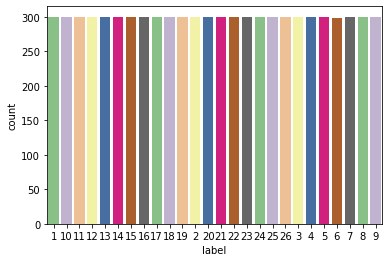

In [80]:
sns.countplot(x = 'label', data = df, palette = "Accent")

In [85]:
pd.DataFrame(df['label'].value_counts()).transpose() #εμφανίσεις 0 και 1 στη στήλη label

,9,8,10,11,12,14,15,16,17,18,19,2,20,21,22,23,24,25,26,3,4,5,7,1,13,6
label,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,299,298


ισορροπημενοοο μπλα μπλα

### Seperation, Split & Scale

Χωρίζουμε τις ανεξάρτητες από τις εξαρτημένες μεταβλητές (seperation). Η είσοδος Χ θα έχει **33 μεταβλητές** (34 - σταθερή μεταβλητή `a02`) και **351 παρατηρήσεις** και η έξοδος y θα είναι ένα διάνυσμα με τον ίδιο αριθμό παρατηρήσεων:

In [86]:
X = df.values[:, :-1]
X.shape

(7797, 617)

In [94]:
y = df.values[:, -1]
y.shape

(7797,)

Υλοποιούμε το **διαχωρισμό** του dataset, σε **train** και **test** set (split), και κανονικοποιούμε τις παρατηρήσεις (scale), με τη βοήθεια των `train_test_split` και `StandardScaler` αντίστοιχα, από τη βιβλιοθήκη `sklearn`:

In [88]:
from sklearn.model_selection import train_test_split

# η παράμετρος random_state είναι ο seed για το shuffling.
# κάνει την έξοδο του αλγορίθμου αναπαράξιμη (reproducible output)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Δεν κανονικοποιούμε τη λογική μεταβλητή.
x_train[:, 1:] = scaler.fit_transform(x_train[:, 1:])
x_test[:, 1:] = scaler.transform(x_test[:, 1:])

## Μοντελοποίηση

### Baseline Classification

Θα ξεκινήσουμε τη μοντελοποίηση, εκτελώντας ορισμένες dummy στρατηγικές ταξινόμησης του dataset μας. Οι dummy classifiers ταξινομούν με κάποιους απλούς κανόνες-στρατηγικές τα δεδομένα. Χρησιμοποιούνται ως benchmarks για το scaling και ranking άλλων μοντέλων.


Θα χρησιμοποιήσουμε τον `DummyClassifier`της sklearn για να εξετάσουμε την ακρίβεια όλων των διαθέσιμων στρατηγικών:

In [95]:
from sklearn.dummy import DummyClassifier

In [112]:
#dclf = DummyClassifier(strategy="most_frequent")
#dclf.fit(X, y)
#DummyClassifier(strategy='most_frequent')
#dclf.predict(X)
#dclf.score(X, y)

0.6410256410256411

In [110]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant'] 
  
dummy_scores = [] 
for s in strategies: 
    if s =='constant': 
        dclf = DummyClassifier(strategy = s, random_state = 0, constant = '3') # se poia stathera-gramma paei kalutera?
    else: 
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(x_train, y_train)
    #dclf.predict(x_train)
    score = dclf.score(x_test, y_test) 
    dummy_scores.append(score) 

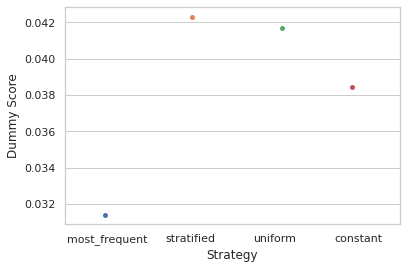

In [111]:
sns.set_theme(style = "whitegrid")
ax = sns.stripplot(x = strategies, y = dummy_scores); 
ax.set(xlabel = 'Strategy', ylabel = 'Dummy Score') 
plt.show() 

### Bernoulli Naive Bayes

Ας δούμε πως ταξινομεί τα δεδομένα μας ο 

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
nbclf = BernoulliNB()
nbclf.fit(x_train, y_train)
BernoulliNB()
>>> print(clf.predict(X[2:3]))

### K Nearest Neighbors

Τώρα θα δούμε πως ταξινομούν οι Κ Nearest Neighbors ταξινομητές.

Επιλέγουμε το σύνολο `neighbor_n` με τα προς εξέταση πλήθη γειτόνων και χρησιμοποιούμε τη συνάρτηση KNeighborsClassifier από την sklearn, για να εξάγουμε την ακρίβεια των kNN ταξινομητών, για k $\in$`neighbor_n`:

In [113]:
from sklearn.neighbors import KNeighborsClassifier 

In [114]:
neighbor_n = list(range(1,15))
  
knn_scores = [] 

for k in neighbor_n: 
    knclf = KNeighborsClassifier(n_neighbors = k)
    knclf.fit(x_train, y_train) 
    #dclf.predict(X)
    score = knclf.score(x_test, y_test) 
    knn_scores.append(score) 

In [ ]:
knn = GridSearchCV(
    KNeighborsClassifier(),
    scoring='roc_auc',
    param_grid={'n_neighbors': [3*(x+1) for x in range(25)]},
    cv=2,
    n_jobs=-1
)
knn.fit(x_train, y_train)

print(knn.best_score_)
print(knn.best_params_)

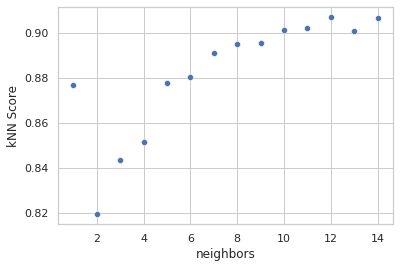

In [115]:
sns.set_theme(style = "whitegrid")
ax = sns.scatterplot(x = neighbor_n, y = knn_scores); 
ax.set(xlabel = 'neighbors', ylabel = 'kNN Score') 
plt.show() 

Παρατηρούμε ότι ο kNN classifier ταξινομεί αποδοτικότερα στους 4 κοντινότερους γείτονες.

# Συμπεράσματα